In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
import cv2


Dataset shape: (70000, 784)
First label: 5


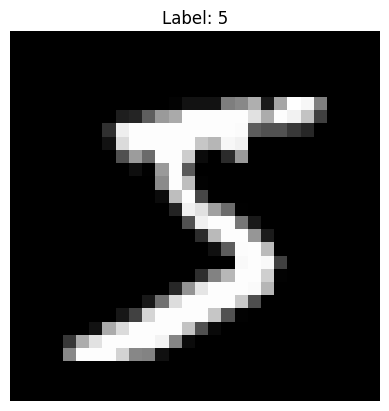

In [27]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

print("Dataset shape:", X.shape)
print("First label:", y[0])

plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y[0]}")
plt.axis('off')
plt.show()


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
model = OneVsRestClassifier(LogisticRegression(max_iter=2000, solver='lbfgs'))
model.fit(X_train_scaled, y_train)


OneVsRestClassifier(estimator=LogisticRegression(max_iter=2000))

In [31]:
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1303    1    5    0    1    7   15    2    8    1]
 [   0 1555    5    8    2   10    2    4   13    1]
 [   7   17 1233   23   16   13   18   16   30    7]
 [   7   10   33 1272    1   38    7   17   25   23]
 [   4    2    9    6 1200    3    6    7   13   45]
 [   8   10    5   48   14 1115   21    7   35   10]
 [   4    6   16    1   11   22 1329    1    6    0]
 [   7    4   22    3   15    8    0 1407    4   33]
 [  14   37   17   44    9   46   14    8 1141   27]
 [   9   10    6   22   44    9    0   50   13 1257]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.89      0.89      0.89      1433
           4       0.91      0.93      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95   

In [41]:
def preprocess_custom_image(img_path):
    # Load image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError(f"Image not found at path: {img_path}")

    # Resize to 28x28
    img_resized = cv2.resize(img, (28, 28))

    # Invert (white digit on black background like MNIST)
    img_inverted = cv2.bitwise_not(img_resized)

    # Show the preprocessed image
    plt.imshow(img_inverted, cmap='gray')
    plt.title("Preprocessed Input Image")
    plt.axis('off')
    plt.show()

    # Flatten to 1D array (1, 784) and scale
    img_flat = img_inverted.reshape(1, -1).astype('float32')
    img_scaled = scaler.transform(img_flat)

    return img_scaled


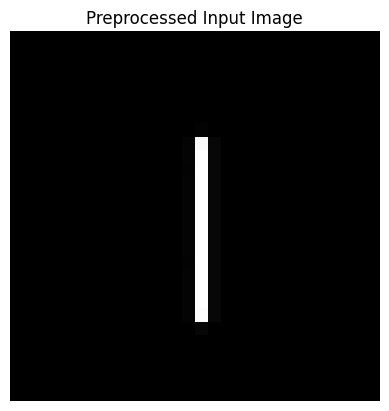

Predicted Digit: 1


In [61]:
image_path = '/content/1.png'  # 🔁 Replace this with your actual image path

try:
    custom_input = preprocess_custom_image(image_path)
    prediction = model.predict(custom_input)
    print(f"Predicted Digit: {prediction[0]}")
except Exception as e:
    print("Error:", e)
